
<center>
<img src="https://i.postimg.cc/158z72Yj/car1.png" width=1100>
</center>

# OVERVIEW

# About this competition

**Task**: To develop a model that can be used to predict the **price** of used cars based on various attributes.

**Dataset**: Training dataset (train.csv): Contains features along with the target variable, price is the continuous target.Test dataset (test.csv): Contains the features but requires predictions the value of price for each row.

**Evaluation**: The performance of the model is evaluated using the Root Mean Squared Error (RMSE).

The dataset was generated from a deep learning model

# Features description
 
| NAME         | DESCRIPTION       | 
|-------------------------------------------|-----------|
| |                                 <div style="color:blue; text-align:center"> Numerical Features  </div>    |
| **<mark> Price (Target variable)</mark>**                 | We want to predict, which is the sale price of the used car|
| **Model year**                 |  The year the car was manufactured and rolled out from the factory. Indicates the actual production year of the vehicle|
|**Mileage**|The mileage of the car, indicating how far the car has been driven|
| |                                 <div style="color:blue; text-align:center"> Categorical Features  </div>    |
|**Brand** | The manufacturer of the car (BMW, Audi, Chevrolet, etc)|
|**Model** | The model name of the car (BMW 328i, Chevrolet Camaro 1LT, etc.)|
|**Fuel type** | The type of fuel the car uses (Gasoline, Diesel, Electric, etc.)|
|**Engine type** | The specifications of the car’s engine (displacement, number of cylinders and horsepower)|
|**Transmission** | The type of transmission in the car ( Automatic -A/T, Manual -M/T, etc.)|
|**Exterior & interior colors** | The exterior and interior color of the car|
|**Accident history** |  Indicates whether the car has been involved in any accidents or has sustained damage|
|**Clean title** | Indicates the status of the car's title. 'Yes' / 'No' means the car has / doesn't have a clean title|




# LIBRARIES AND DATA LOADING

In [1]:
# Importing Libs

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from prettytable import PrettyTable

#sns.set(style="whitegrid", palette="pastel")
import warnings
warnings.filterwarnings("ignore")


# Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.model_selection import StratifiedKFold

# Model library
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from catboost import CatBoostRegressor, Pool
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

warnings.filterwarnings("ignore") #seaborn is loud...

# Model Evaluating
from sklearn.metrics import mean_squared_error

In [2]:
# Loading the Datasets

path  = '/kaggle/input/playground-series-s4e9/'
train = pd.read_csv(path + 'train.csv')
test  = pd.read_csv(path + 'test.csv')
subs  = pd.read_csv(path + 'sample_submission.csv')

In [3]:
# Data Dimensions

print(' >> Train Data dimensions: ' , train.shape)
print(' >> Test  Data dimensions: ' , test.shape)

 >> Train Data dimensions:  (188533, 13)
 >> Test  Data dimensions:  (125690, 12)


### Showing of the train dataset

In [4]:
def table(dd):
    c='#00c09f'
    return dd.style.set_table_styles([
                            {
                                "selector":"thead",
                                "props":"background-color:lightgrey; color:black; font-size:1.0rem;"
                                                            },
                          #  {"selector":"td",
                          #  "props":"color:black; font-size:0.8rem; border:1px solid lightgray"},
        
                         {"selector":"td",
                     "props":"border:solid lightgrey;  color:black; font-size:0.9rem; border:1px solid lightgray"},
                            
    ])

table(train.head(3))

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability,A/T,Blue,Gray,None reported,Yes,13900


### Showing of the test dataset

In [5]:
table(test.head(3)) 

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoline/Mild Electric Hybrid,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,nan


### Showing of the sub sample

In [6]:
table(subs.head(3)) 

,id,price
0,188533,43878.016000
1,188534,43878.016000
2,188535,43878.016000


###  Duplicates check

In [7]:
print('The duplicate rows in the train dataset :', train.duplicated().sum() )

The duplicate rows in the train dataset : 0


In [8]:
print('The duplicate rows in the test dataset :', test.duplicated().sum() )

The duplicate rows in the test dataset : 0


### The data type of each columns of train dataset

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


We have 3 numerical column: milage, model_year and price and several categorical

In [10]:
features     = ['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title', 'price']
num_features = ['model_year', 'milage']
cat_features = ['clean_title', 'accident', 'model', 'transmission', 'engine', 'ext_col', 'fuel_type', 'int_col', 'brand']

# DATA PREPARATION

# Filling of missing values

Before:

In [11]:
print('The missing values of train dataset : \n', train.isnull().sum())

The missing values of train dataset : 
 id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64


In [12]:
print('The missing values of test dataset : \n' , test.isnull().sum())

The missing values of test dataset : 
 id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
dtype: int64


We can observe that there are **many** missing values in the **'clean_title'** column. It’s possible that respondents avoided answering to hide the fact that the car does not have a **clean title**. Therefore, it’s important to handle these missing values carefully or explore various methods to address them. 

We'll clean them.

In [13]:
def cleaning_data(df):

    fuel_type_imputer = SimpleImputer(strategy='most_frequent')
    df['fuel_type']   = fuel_type_imputer.fit_transform(df[['fuel_type']]).ravel() 
    
    missing_label_imputer = SimpleImputer(strategy='constant', fill_value='missing')
    df[['accident', 'clean_title']] = missing_label_imputer.fit_transform(df[['accident', 'clean_title']])
    
    return df

After:

In [14]:
df_train_cleaned = cleaning_data(train)
print('The missing valuse of train dataset after handling missing values : \n', df_train_cleaned.isnull().sum())

The missing valuse of train dataset after handling missing values : 
 id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64


In [15]:
df_test_cleaned = cleaning_data(test)
print('The missing values of test dataset : \n' , test.isnull().sum())

The missing values of test dataset : 
 id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64


# Encoding¶

We have two numerical features: **model_year** and **milage**. We'll use **Ordinal Encoding** for the categorical features.
The numerical features will be standardized.

In [16]:
num_features = ['milage', 'model_year']
cat_features = ['clean_title', 'accident', 'model', 'transmission', 'engine', 'ext_col', 'fuel_type', 'int_col', 'brand']

num_cols = ["model_year", "milage"]
cat_cols = ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']

target_col = "price"

In [17]:
def extract_data(df):
    df = df.copy()
    df['transmission'] = df['transmission'].str.lower()
    # Extract horsepower, engine size, cylinders, and transmission speed
    df['horsepower']  = df['engine'].str.extract(r'(\d+\.\d+)(?=HP)').astype(float)
    df['engine_size'] = df['engine'].str.extract(r'(\d+\.\d+)(?=L)').astype(float)
    df['cylinders']   = df['engine'].str.extract(r'(\d+)\s(Cylinder|V\d|Straight)')[0].astype(float)
    #     df['transmission_speed'] = df['transmission'].str.extract(r'(\d+)(?=-)').astype(float)
    
    # Classify transmission type
    df['transmission_type'] = df['transmission'].apply(lambda x: 
                                                       'manual' if 'm/t' in x or 'manual' in x or  'mt' in x else 
                                                       'automatic' if 'a/t' in x or 'automatic' in x or  'at' in x else 
                                                       'CVT' if 'CVT' in x else 
                                                       'Other')
    
    return df

# Apply the function
train = extract_data(train)
test = extract_data(test)  

# Print specific columns to check results
#print(df[['transmission', 'transmission_type']])

# Check the shape to ensure no columns are removed
#print(df.shape)

In [18]:
# Define a function to extract fuel type from the engine column
def extract_fuel_type(engine_info):
    if pd.isna(engine_info):
        return np.nan
    if 'Gasoline' in engine_info:
        return 'Gasoline'
    elif 'Hybrid' in engine_info:
        return 'Hybrid'
    elif 'Flex Fuel' in engine_info or 'E85' in engine_info:
        return 'Flex Fuel'
    elif 'Diesel' in engine_info:
        return 'Diesel'
    elif 'Electric' in engine_info:
        return 'Electric'
    else:
        return np.nan

train['extracted_fuel_type'] = train['engine'].apply(extract_fuel_type)
train['fuel_type'].fillna(train['extracted_fuel_type'], inplace=True)
train.drop(columns=['extracted_fuel_type'], inplace=True)

test['extracted_fuel_type'] = test['engine'].apply(extract_fuel_type)
test['fuel_type'].fillna(test['extracted_fuel_type'], inplace=True)
test.drop(columns=['extracted_fuel_type'], inplace=True)

### Train dataset after preparation:

In [19]:
table(train.head(3))

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,horsepower,engine_size,cylinders,transmission_type
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,a/t,Yellow,Gray,None reported,Yes,4200,172.000000,1.600000,4.000000,automatic
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,a/t,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252.000000,3.900000,8.000000,automatic
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability,a/t,Blue,Gray,None reported,Yes,13900,320.000000,5.300000,8.000000,automatic


# EXPLORATORY DATA ANALYSIS

# Features structure

We have 3 numerical column: **milage**, **model_year** and **price** and several categorical. 

Let's show structure of the numerical fearures.

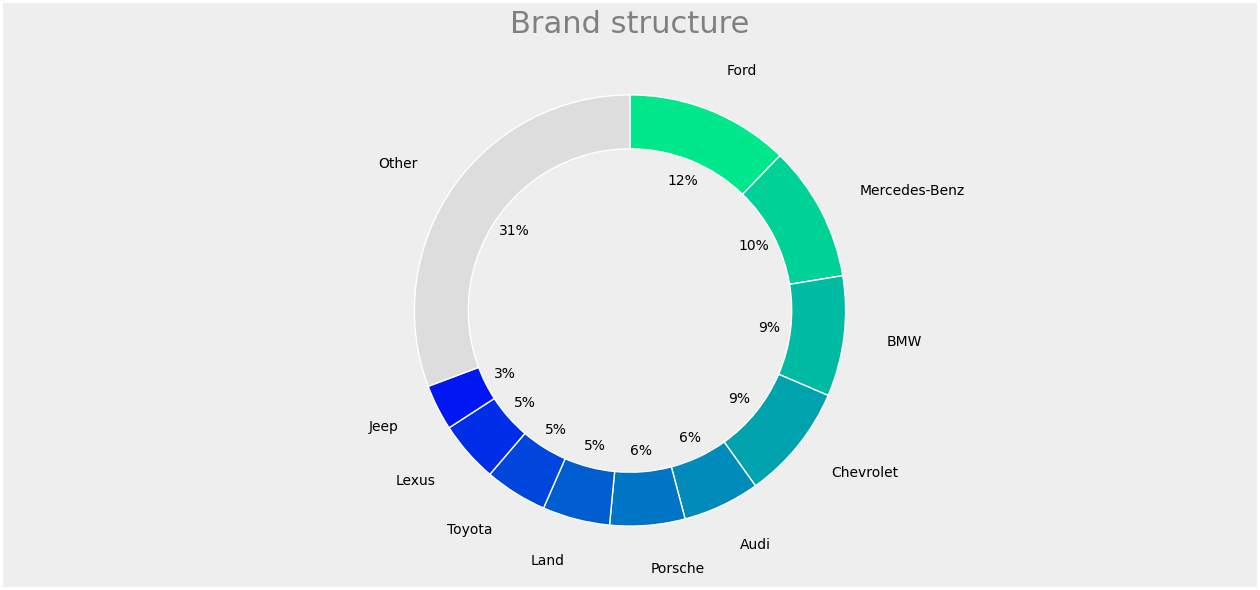

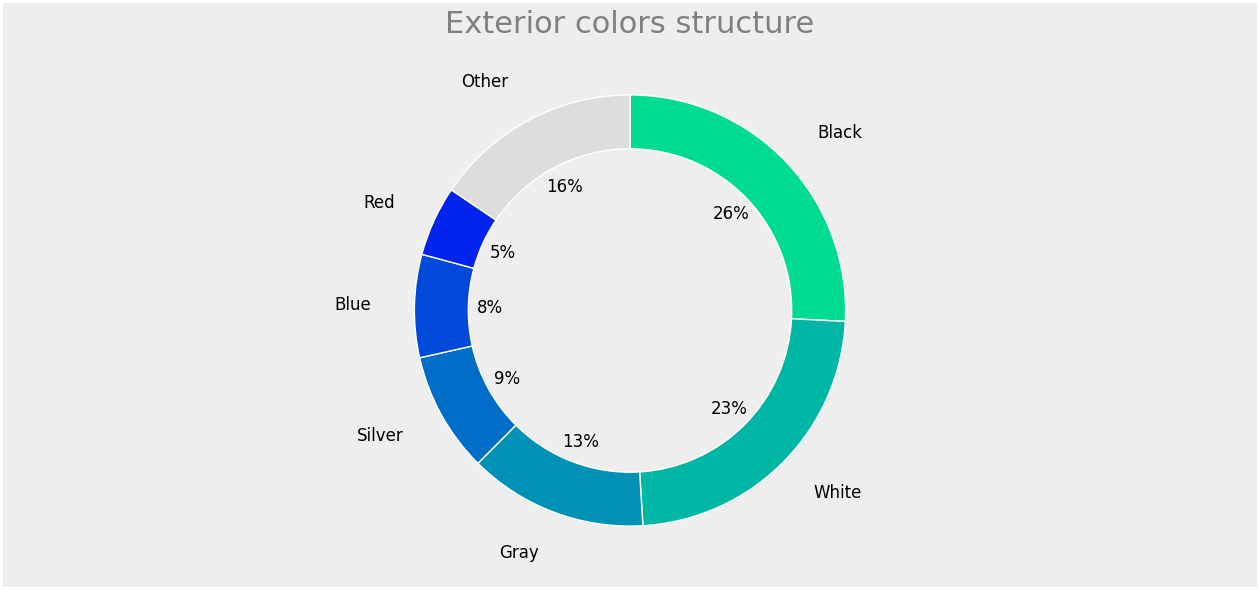

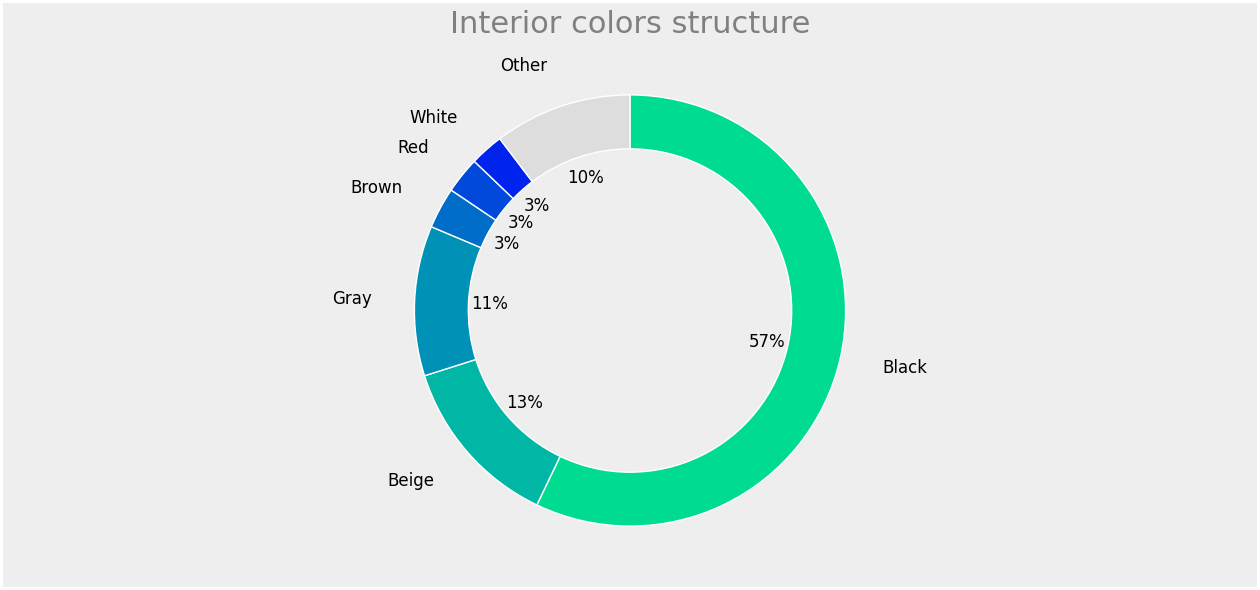

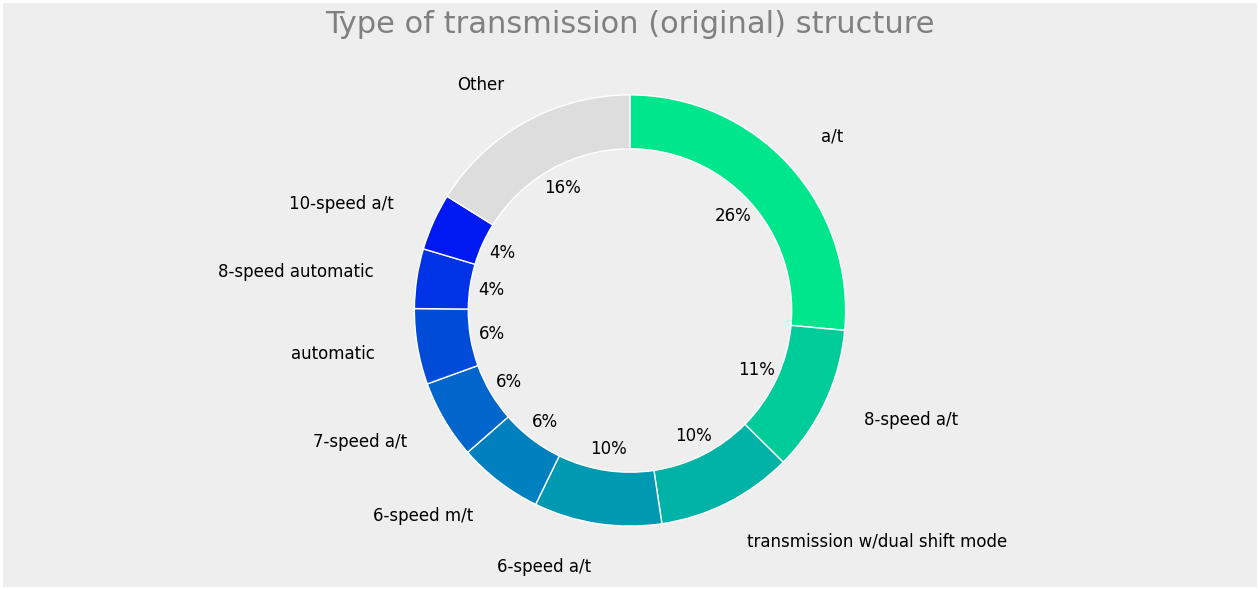

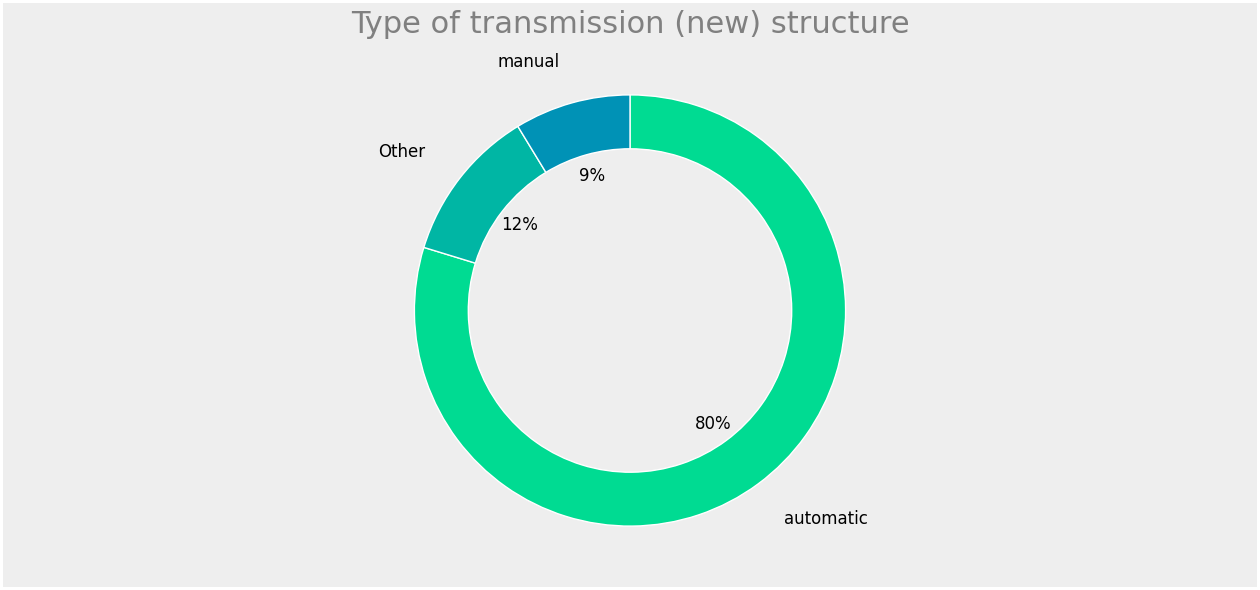

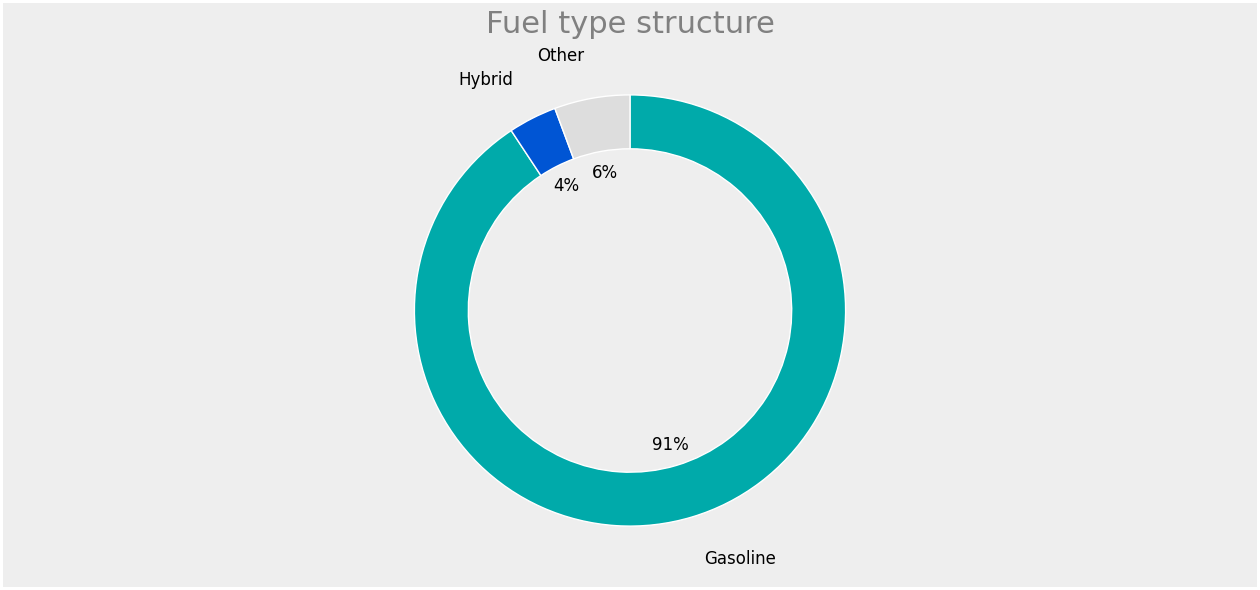

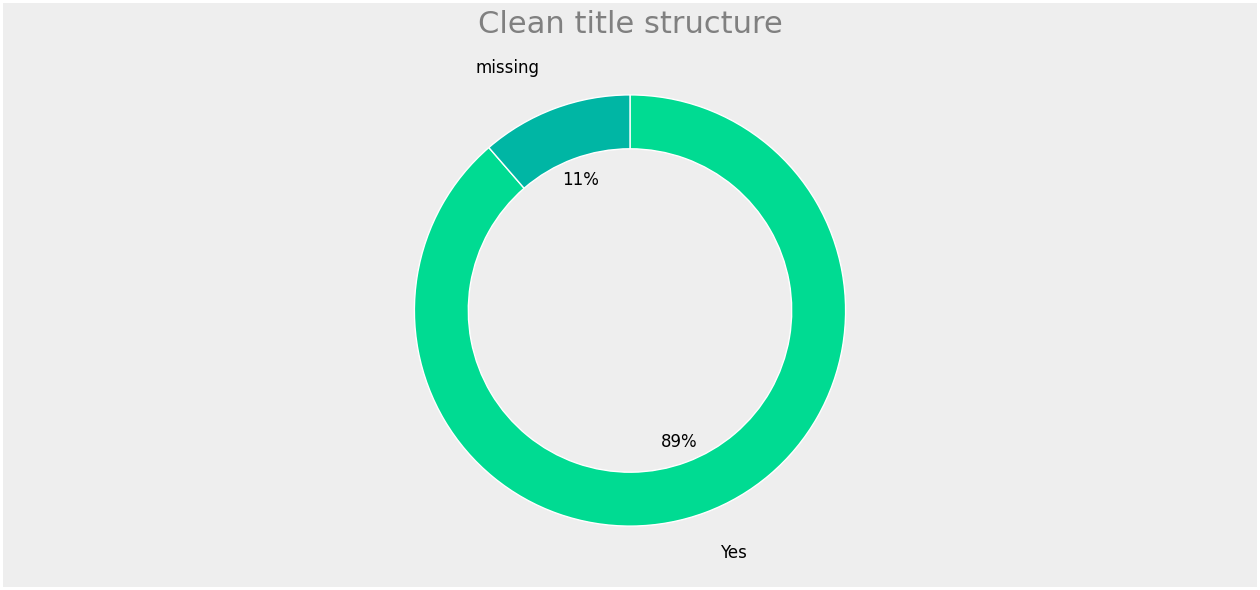

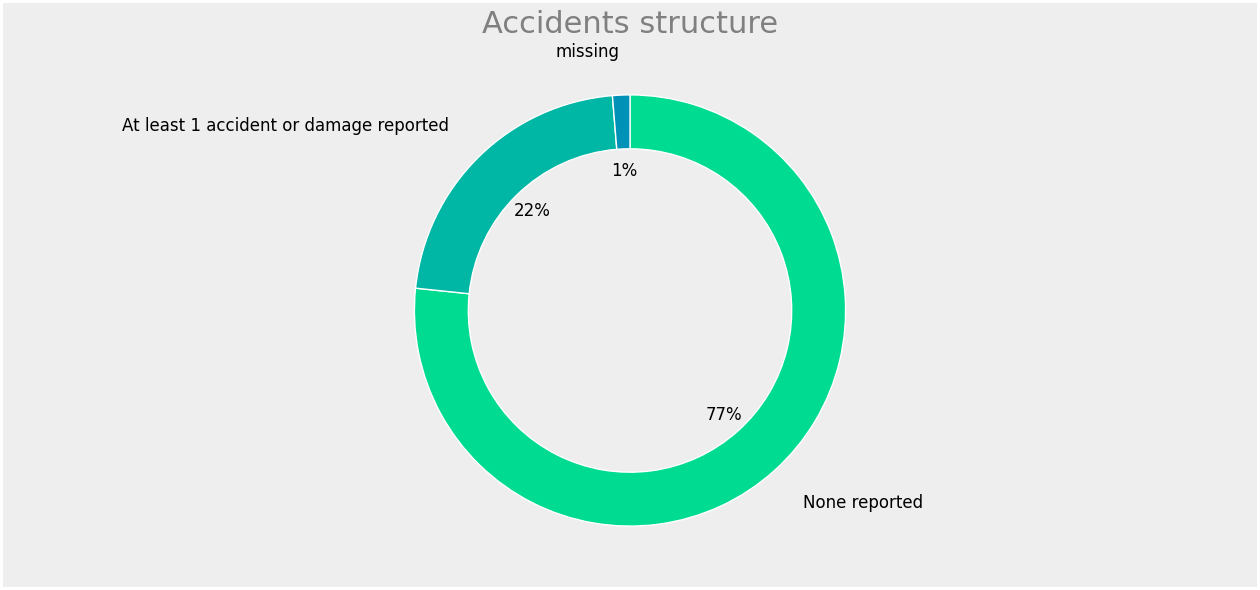

In [20]:
def Pie1(NC, dd, other, title):
#    NC  number of categor.
    if other:
        palette_color =  list(reversed(sns.color_palette("winter",n_colors = NC).as_hex()))+['#dddddd']
        d1 = dd.value_counts(normalize=True)
        d2 = d1[0:NC]
        d2['Other']=1-d1[0:NC].sum()
    else:
        palette_color =  list(reversed(sns.color_palette("winter").as_hex()))
        d1 = dd.value_counts(normalize=True)
        d2 = d1
        
    plt.pie(d2, autopct = '%1.0f%%', wedgeprops=dict(width=0.25, edgecolor='white'), labels = d2.index.tolist(),
           pctdistance=0.65, labeldistance=1.2, colors=palette_color, startangle=90, 
            counterclock=False)
  
    plt.rcParams['font.size'] = 12
    plt.title(f'{title}', color='gray', fontsize=22)
    
col    = ['brand', 'ext_col', 'int_col','transmission', 'transmission_type', 'fuel_type', 'clean_title', 'accident']
NCS = [10, 6, 6, 9, 0, 2, 0, 0]
titles = ['Brand structure', 'Exterior colors structure', 'Interior colors structure', 
          'Type of transmission (original) structure', 'Type of transmission (new) structure',
          'Fuel type structure', 'Clean title structure', 'Accidents structure']
j=0
for i in col:
    #plt.figure(figsize=(16, 6)) 
    fig, axs  = plt.subplots(1, 3, figsize=(16 ,7))
    plt.subplot(1,5, 1)
    plt.axis('off')
    plt.subplot(1,5, (2,4))

    if NCS[j] == 0:
        Pie1(1, train[i], False, titles[j])
    else:
        Pie1(NCS[j], train[i], True, titles[j])
    fig.patch.set_linewidth(3)
    #fig.patch.set_edgecolor('black')  
    fig.patch.set_facecolor('#eeeeee')
    
    plt.subplot(1,5, 5)
    plt.axis('off')
    plt.show()
    j=j+1
    print()

Then we visualize the distribution of price

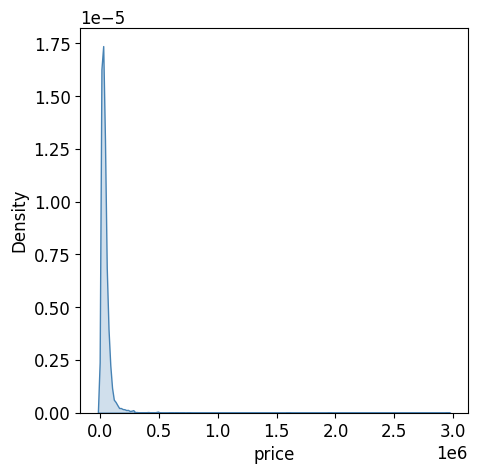

In [21]:
fig, axs  = plt.subplots(1, 1, figsize=(5, 5))
ax = sns.kdeplot(data=train, x='price', color='steelblue', fill=True, log_scale=False)
ax.set(xlabel='price')
plt.show()

We see that the **price** distribution is **not normal**, therefore we'll perform log-normalization

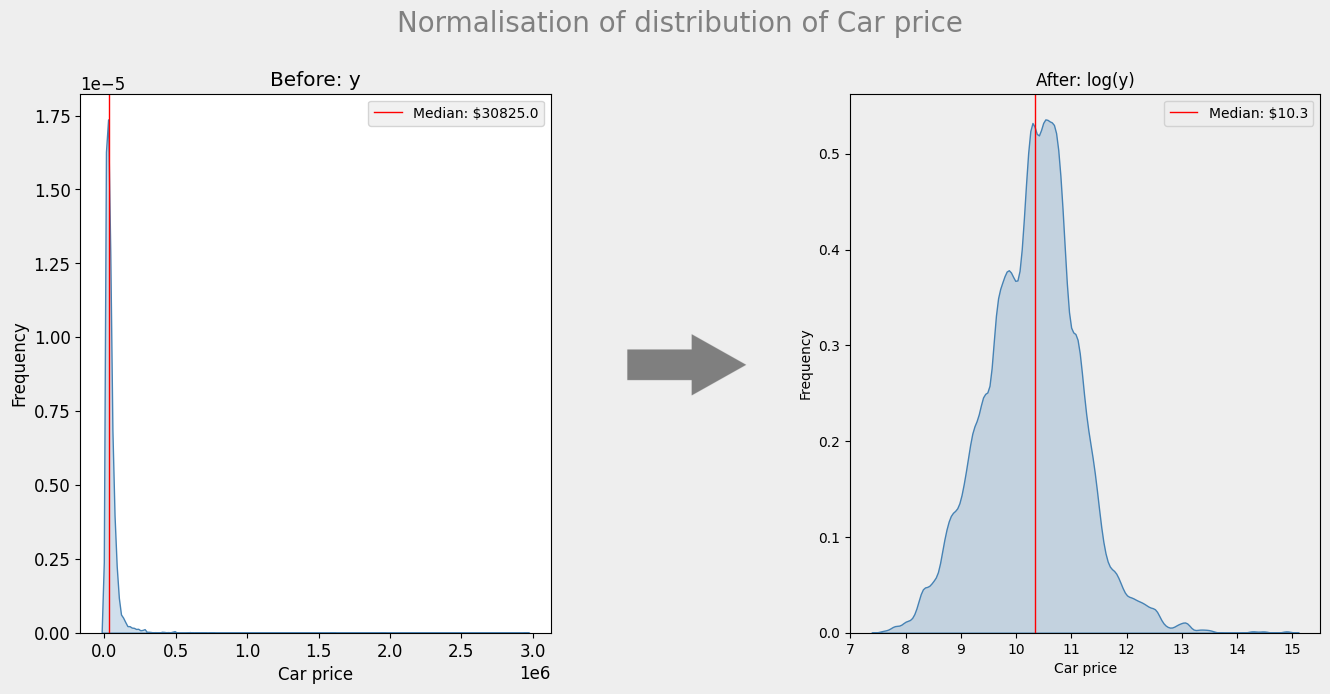

In [22]:
from skimage import io
SupTitleSize=20

def hist_one(d, b, col, transf):
    color1= '#ddddff'
    #plt.hist(d, bins=b, color='skyblue', edgecolor='white', density = True)
    sns.kdeplot(d, color='steelblue', fill=True, log_scale=False)
    #sns.histplot(d, kde=True, color='skyblue', bins=40, alpha=0.7, line_kws={'linewidth': 2, 'color': 'black'}, edgecolor='white')
    
    # Adding mean and median lines
    #mean_price = d.mean()
    median_price = d.median()
    #plt.axvline(mean_price, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_price:.2f}')
    plt.axvline(median_price, color='red', linestyle='-', linewidth=1, label=f'Median: ${median_price:.1f}')
    
    plt.title(transf)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.rcParams['font.size'] = 10
    fig.patch.set_linewidth(1)
    #fig.patch.set_edgecolor('black')  
    plt.rcParams['axes.facecolor'] = '#eeeeee'
    plt.legend()

def hist1(t1, t2, col, transf):
    fig, axs  = plt.subplots(1, 3, figsize=(16, 7))
    #plt.title(f'{title}', color='gray', fontsize=20)
    plt.suptitle(f'Normalisation of distribution of {col}', fontsize=SupTitleSize, y=1,  color='gray')

    plt.subplot(1, 5, (1,2))
    hist_one(t1, 100, col, transf='Before: y')

    plt.subplot(1, 5, 3)
    a = io.imread("https://i.postimg.cc/PxxDw6W8/arrow2.png")
    plt.imshow(a)
    plt.axis('off')

    plt.subplot(1, 5, (4,5))
    hist_one(t2, 30, col, f'After: {transf}(y)')
    
    fig.patch.set_facecolor('#eeeeee')
    plt.show()
    
t1 = train.price
#t2 = np.power(train.price, 1/15) 
t2 = np.log(train.price) 
hist1(t1, t2, 'Car price', 'log')

Let's show on model_year distribution:

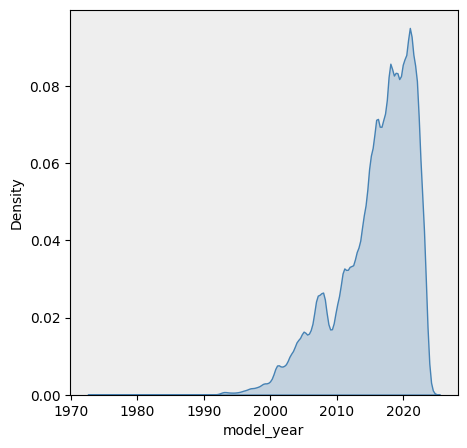

In [23]:
fig, axs  = plt.subplots(1, 1, figsize=(5, 5))
ax = sns.kdeplot(data=train, x='model_year', color='steelblue', fill=True, log_scale=False)
ax.set(xlabel='model_year');
plt.show()

And finally let's show on milage distribution:

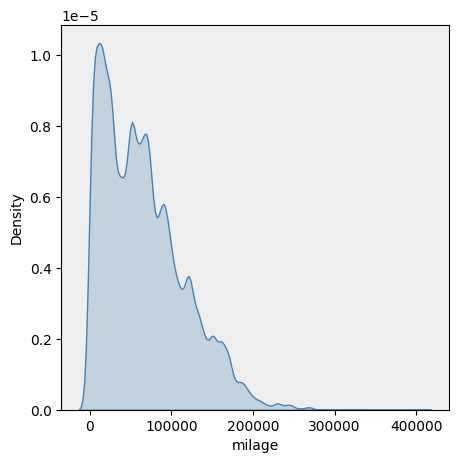

In [24]:
fig, axs  = plt.subplots(1, 1, figsize=(5, 5))
ax = sns.kdeplot(data=train, x='milage', color='steelblue', fill=True, log_scale=False)
ax.set(xlabel='milage');
plt.show()

And we'll perform root-normalization:

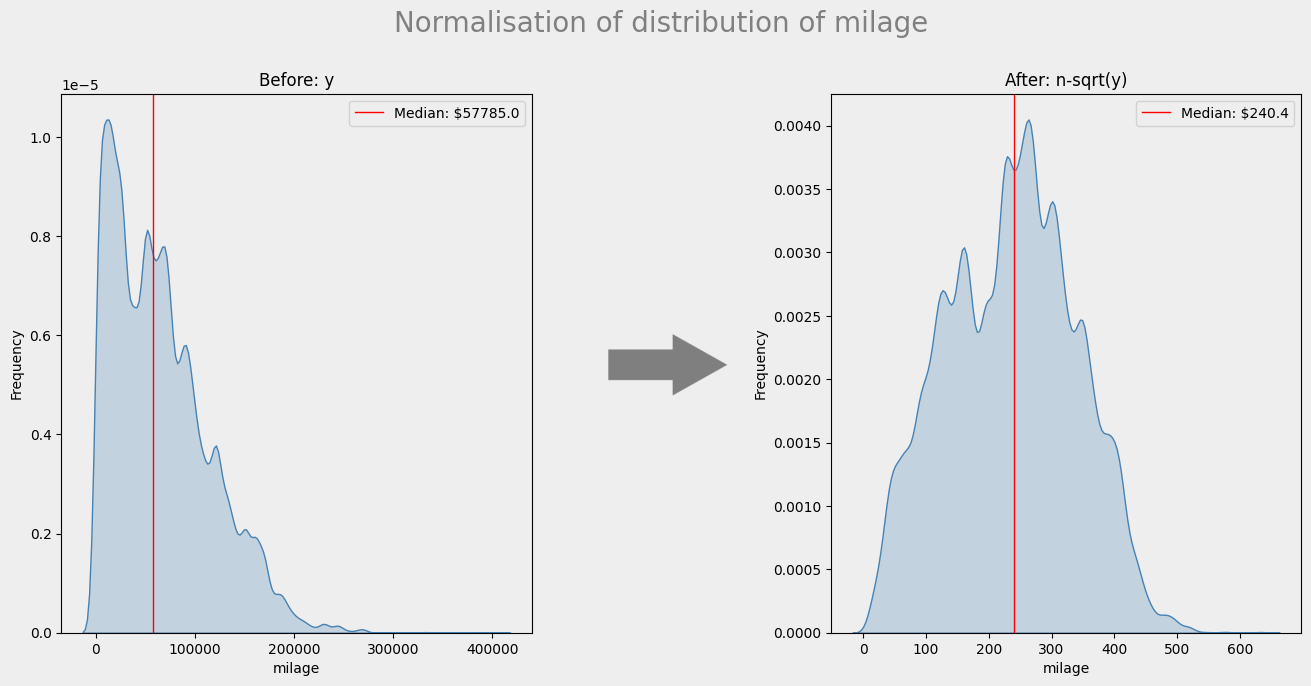

In [25]:
t1 = train.milage
t2 = np.power(train.milage, 1/2)
hist1(t1, t2, 'milage', 'n-sqrt')

# Relationships between numerical variables

 Let's see relationship between mileage and price. 

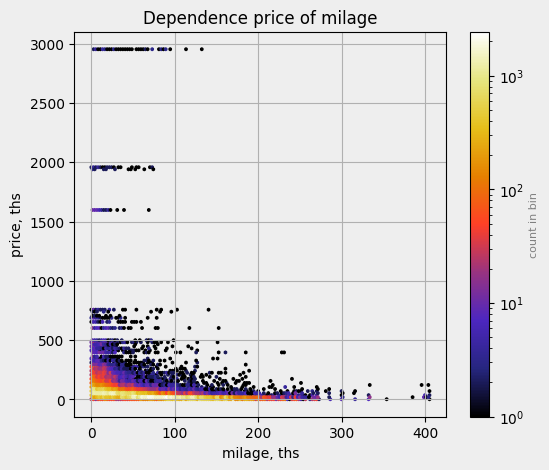

In [26]:
def hexb_one(x, y, title):
    gs=150
    fig, axs  = plt.subplots(1, 1, figsize=(6, 5))
    Cmap = 'CMRmap'
    plt.title(title)
    plt.hexbin (x=x, y=y, gridsize=gs, cmap=Cmap, bins='log', alpha = 1)
    #sns.regplot(data=train, x='model_year', y='price',  fit_reg=1, line_kws=dict(color=color_r, linewidth=2), order =1) 
    fig.patch.set_facecolor('#eeeeee')
    plt.colorbar().set_label(label='count in bin',size=8, color  = 'grey')
    plt.grid()


color_r='orange'

#plt.subplot(1, 1, 1)
hexb_one(train.milage/1000,  train.price/1000, 'Dependence price of milage')
plt.xlabel('milage, ths')
plt.ylabel('price, ths')  
plt.show()
    


We see obvious observations: the lower the mileage and the higher the year, the higher the price

We can see that there is no a clear relationship between mileage and price. 


We next explore model_year.

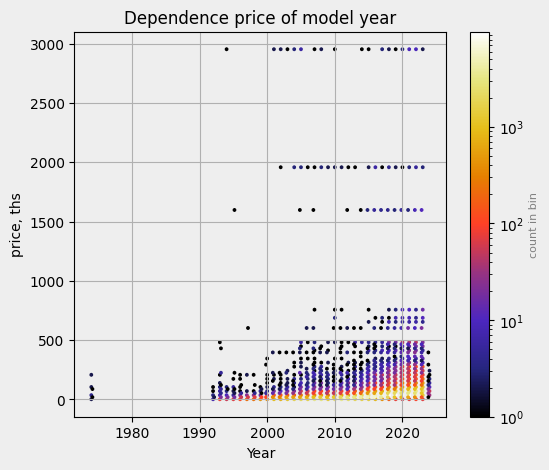

In [27]:
#plt.subplot(1, 1, 1)
hexb_one(train.model_year, train.price/1000, 'Dependence price of model year')
plt.xlabel('Year')
plt.ylabel('price, ths')  
plt.show()

Observations: the lower the mileage and the higher the year, the higher the price

We can see that there is no a clear relationship between model year and price. 

And finally we can see relationship between model year and millage. 

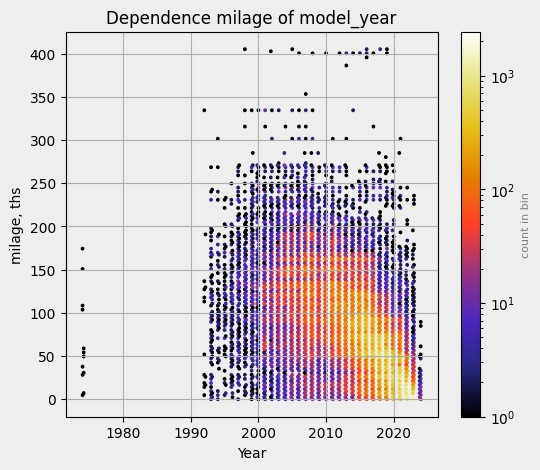

In [28]:
hexb_one(train.model_year, train.milage/1000, 'Dependence milage of model_year')
plt.xlabel('Year')
plt.ylabel('milage, ths')  
plt.show()


We can see observations: the lower the year, the lower the millage

# Correlaion matrix

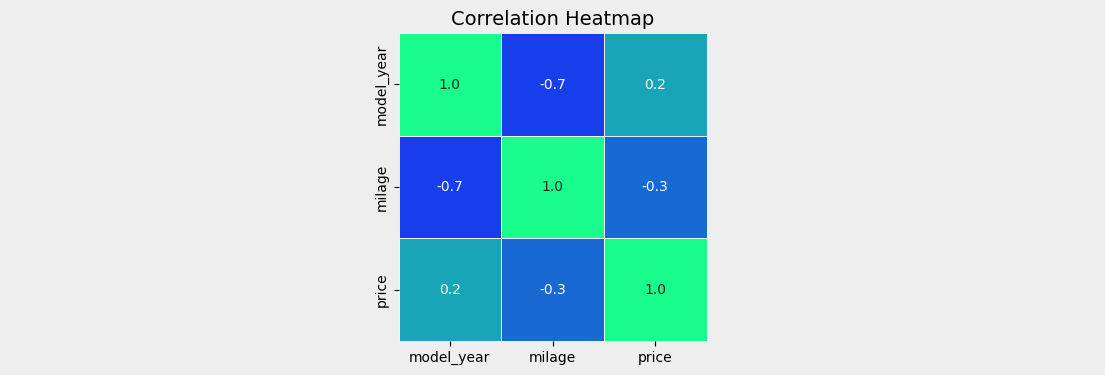

In [29]:
fig, axs  = plt.subplots(1, 3, figsize=(14, 4))
corr_matrix = train[num_cols + [target_col]].corr()
plt.subplot(1, 3,1)
plt.axis('off')
plt.subplot(1, 3,2)
sns.heatmap( corr_matrix, square = True, cmap = 'winter',alpha =0.9, vmin=-1, vmax=1, center= 0, linewidths=0.5, linecolor='white', annot=True, fmt='.1f', cbar=False)
plt.title("Correlation Heatmap", fontsize=14)
#fig.patch.set_edgecolor('black')  
plt.subplot(1, 3,3)
plt.axis('off')
plt.rcParams['axes.facecolor'] = '#eeeeee'
fig.patch.set_facecolor('#eeeeee')

plt.show()

#### Some observation:
- Features **Model** and **Engine** have a lot of unique values. No unique value exceeds 2% of entire dataset
- Would be worth dealing with rare categories - probably combine categories or add "Other" category
- **Clean_Title** feature has only 1 unique value, and 11% of the dataset has Null values, worth adding **"Not Available"**
- There is 2 numerical features
- The correlations between **price** and the other features (**model_year** and **milage**) are moderate.
- The strong negative correlation between **model_year** and **milage** (-0.67) indicates that these two variables are inversely related; thus, one could potentially predict the **mileage** of a car based on its **model year**.


# Modelling

This part is an ensemble of top 5 public notebook solutions as on 11-09-2024.

The scores are improving from 1st to 5th submission.

In [30]:
def read_csv(number: int) -> pd.DataFrame:
    file = pd.read_csv(f'/kaggle/input/top-4-car-prices-used/{number}.csv')  # Use an f-string for cleaner formatting
    return file

csv0 = read_csv(72016)
csv1 = read_csv(72018)
csv2 = read_csv(72020)
csv3 = read_csv(72021)
csv4 = read_csv(72025)



In [31]:
csv = csv0
csv.rename(columns={'price':'72016'}, inplace=True)
csv['72018'] = csv1['price']
csv['72020'] = csv2['price']
csv['72021'] = csv3['price']
csv['72025'] = csv4['price']

csv.head(10).round(0)

,id,72016,72018,72020,72021,72025
0,188533,17286.0,17278.0,17325.0,17253.0,17109.0
1,188534,78406.0,78388.0,78531.0,78342.0,77965.0
2,188535,55893.0,55943.0,55931.0,56057.0,56309.0
3,188536,28963.0,28925.0,28959.0,28845.0,28616.0
4,188537,29857.0,29862.0,29871.0,29912.0,29994.0
5,188538,18667.0,18689.0,18615.0,18770.0,19079.0
6,188539,12248.0,12240.0,12283.0,12253.0,12192.0
7,188540,43399.0,43366.0,43417.0,43398.0,43358.0
8,188541,81726.0,81699.0,81561.0,81698.0,81972.0
9,188542,31785.0,31791.0,31831.0,31732.0,31534.0


In [32]:
csv['price'] = 0.91*csv['72016'] + 0.09*csv['72018']
csv

,id,72016,72018,72020,72021,72025,price
0,188533,17286.205793,17278.279662,17324.902043,17252.808476,17108.621343,17285.492441
1,188534,78406.384175,78388.394866,78530.885844,78342.248924,77964.975084,78404.765137
2,188535,55893.402697,55942.893449,55931.005159,56057.014704,56309.033795,55897.856865
3,188536,28963.187882,28925.059126,28959.438076,28844.935433,28615.930145,28959.756294
4,188537,29856.918937,29862.492397,29870.908127,29911.815200,29993.629346,29857.420548
...,...,...,...,...,...,...,...
125685,314218,28517.042183,28481.697163,28484.390968,28493.702022,28512.324129,28513.861131
125686,314219,51895.372593,51829.165373,51914.048758,51761.255252,51455.668239,51889.413943
125687,314220,20172.305551,20153.927194,20168.307704,20077.553769,19896.045898,20170.651499
125688,314221,15990.390012,15963.589590,15957.349196,15862.217960,15671.955489,15987.977974


In [33]:
sub = subs
sub['price'] = csv['price']
sub.to_csv('./submission.csv', index=False)
sub.head()

,id,price
0,188533,17285.492441
1,188534,78404.765137
2,188535,55897.856865
3,188536,28959.756294
4,188537,29857.420548


## <div  style="color:blue;  font-weight:bold; font-size:100%; text-align:center;padding:12.0px; background:#ffffff"> Thank you for your attention! Please upvote this kernel if you like it. It motivates me to produce more quality content) </div>
